In [32]:
import pandas as pd
import ast
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


def consolidate_data(file_paths):
    master_df = pd.DataFrame()
    for path in file_paths:
        temp_df = pd.read_csv(path)
        temp_df['downside_dev_list'] = temp_df['downside_dev_list'].apply(ast.literal_eval)
        temp_df['cum_ret_list'] = temp_df['cum_ret_list'].apply(ast.literal_eval)
        
        fractional_diff = float(path.split('_')[1])
        temp_df['fractional_diff'] = fractional_diff
        
        master_df = pd.concat([master_df, temp_df], ignore_index=True)
    return master_df

file_paths = [f'AAPL_{i/10:.2f}_result.csv' for i in range(0, 11)]
df = consolidate_data(file_paths)

df.to_csv('output.csv', index=False)

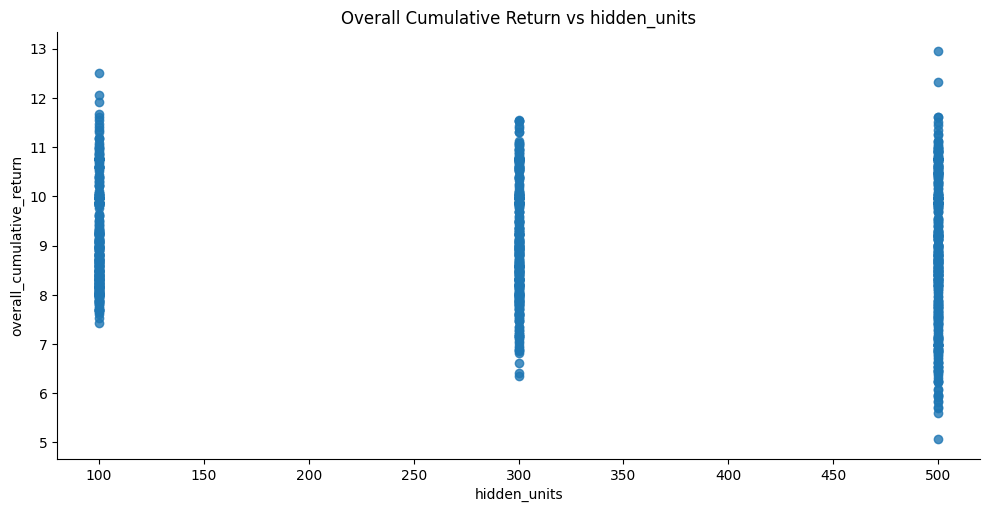

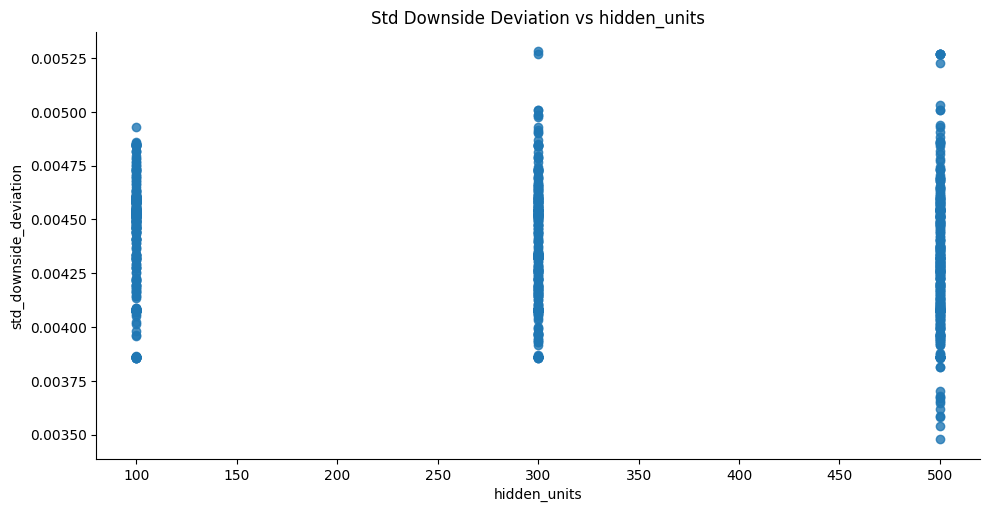

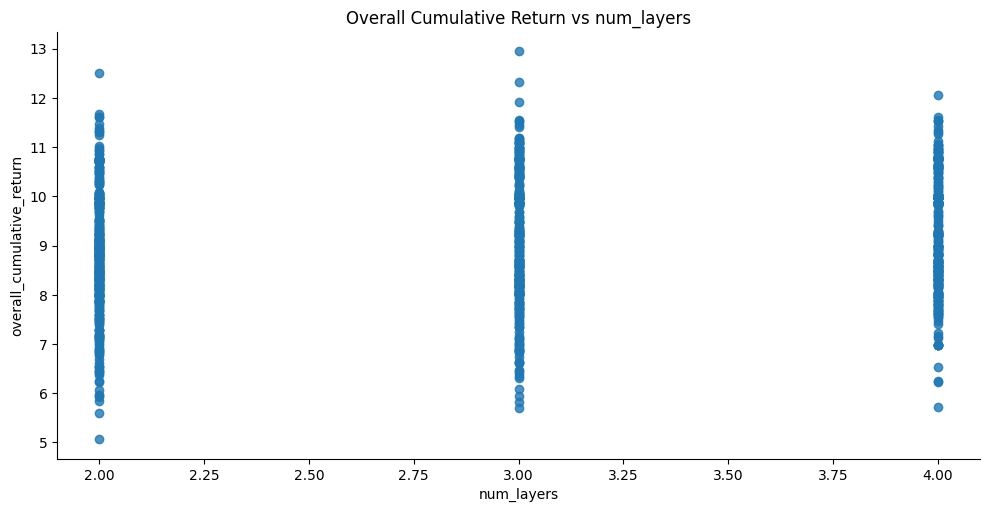

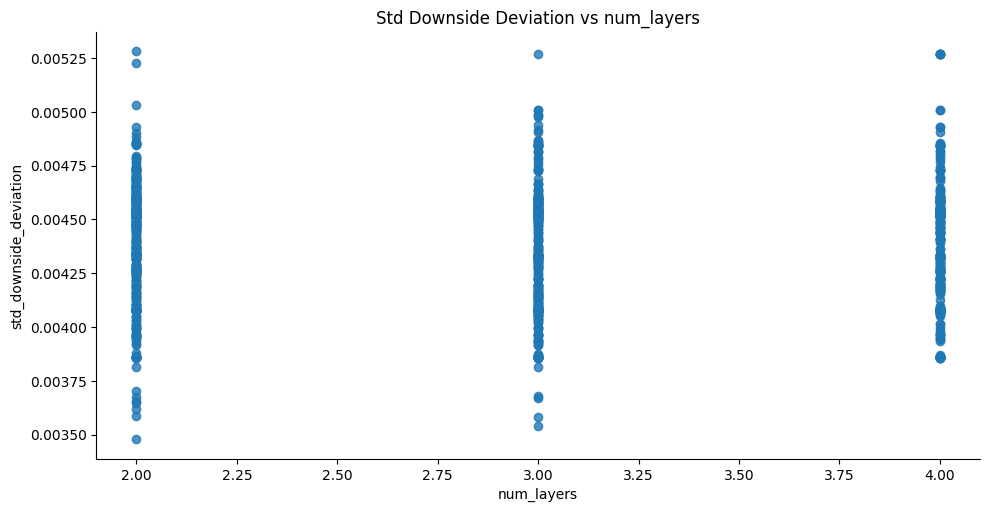

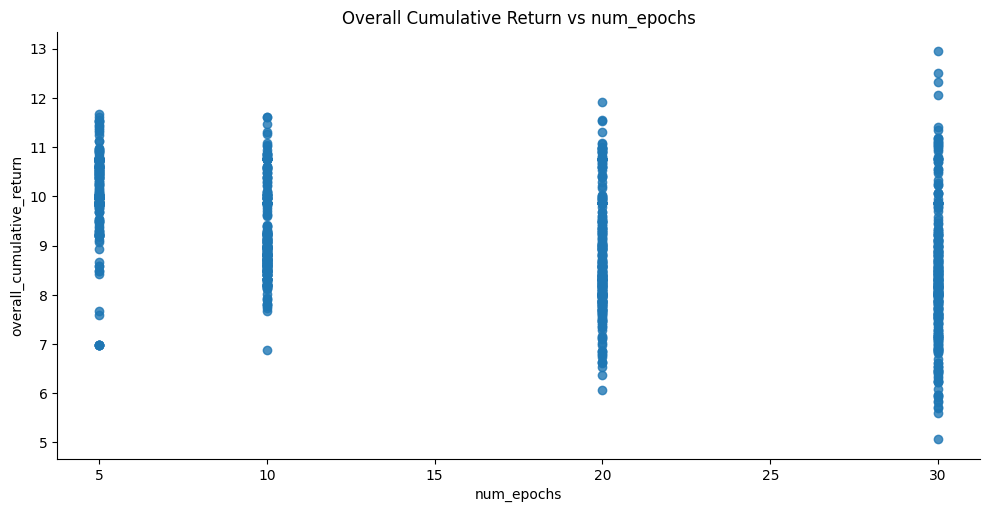

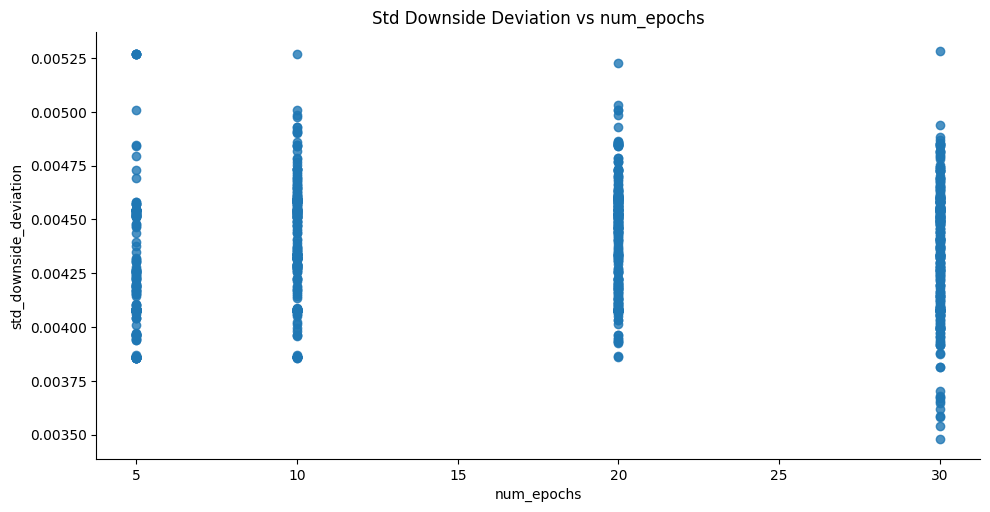

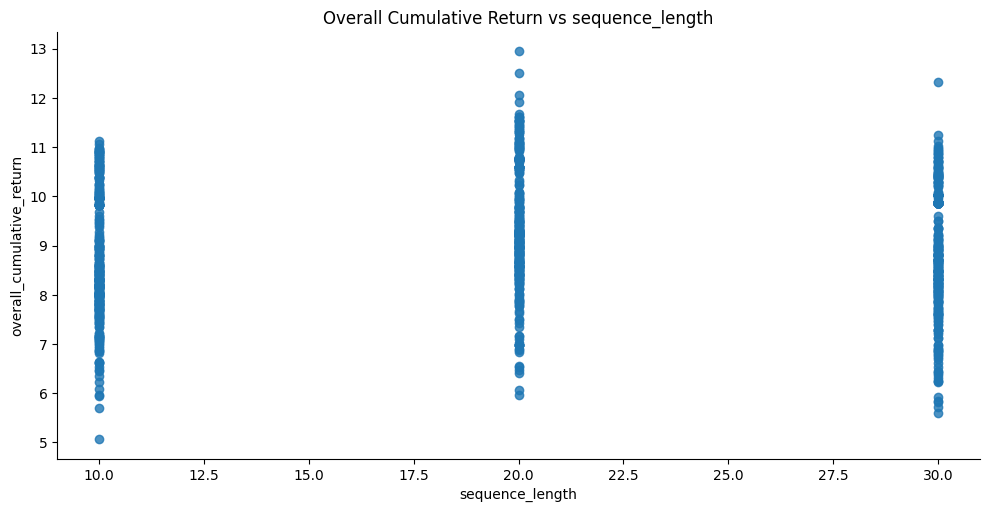

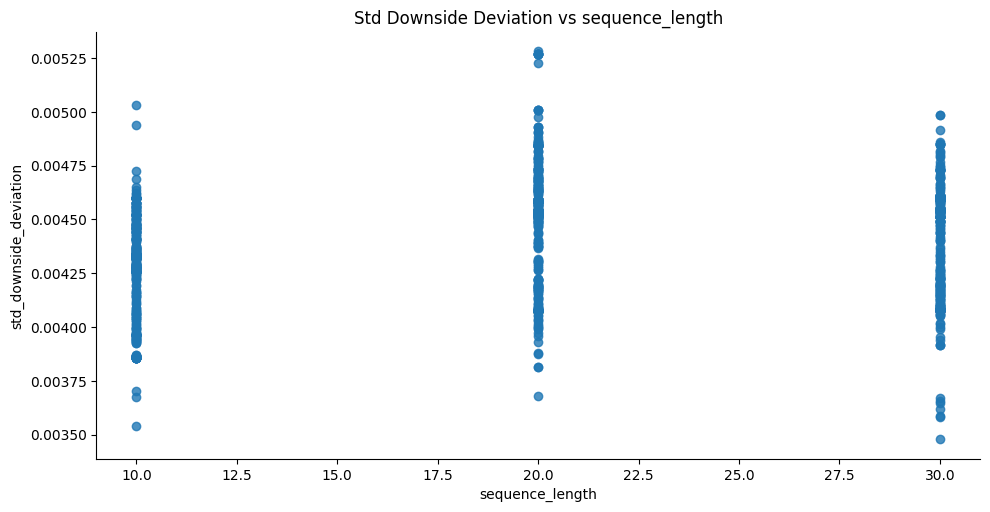

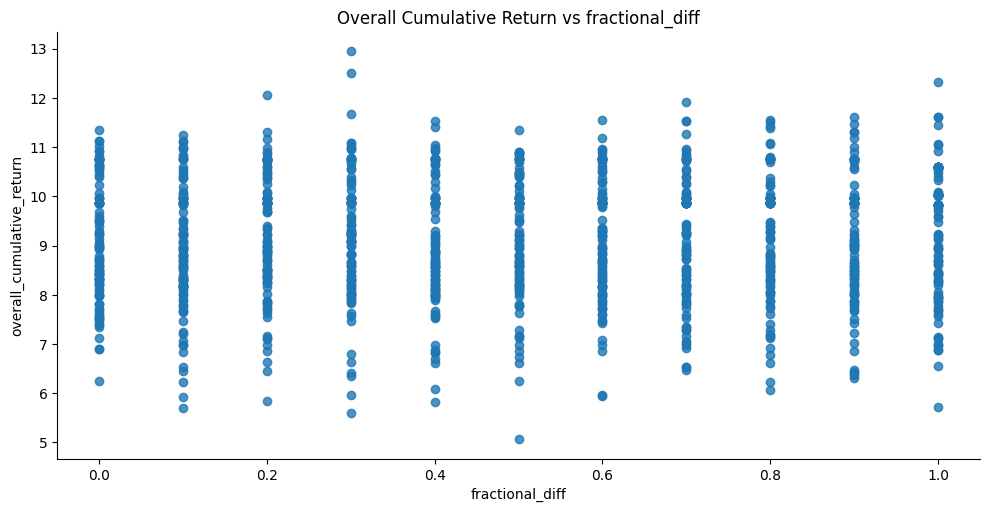

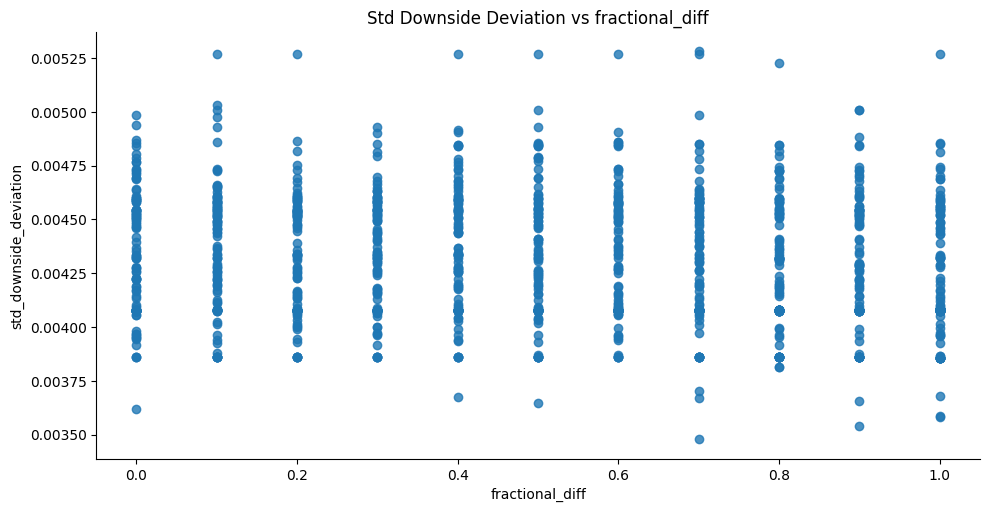

In [33]:
def scatter_without_regression(df, parameters):
    for parameter in parameters:
        sns.lmplot(x=parameter, y='overall_cumulative_return', data=df, aspect=2, line_kws={'color': 'red'}, fit_reg=False)
        plt.title(f'Overall Cumulative Return vs {parameter}')
        plt.show()

        sns.lmplot(x=parameter, y='std_downside_deviation', data=df, aspect=2, line_kws={'color': 'red'}, fit_reg=False)
        plt.title(f'Std Downside Deviation vs {parameter}')
        plt.show()

parameters = ['hidden_units', 'num_layers', 'num_epochs', 'sequence_length', 'fractional_diff']
scatter_without_regression(df, parameters)

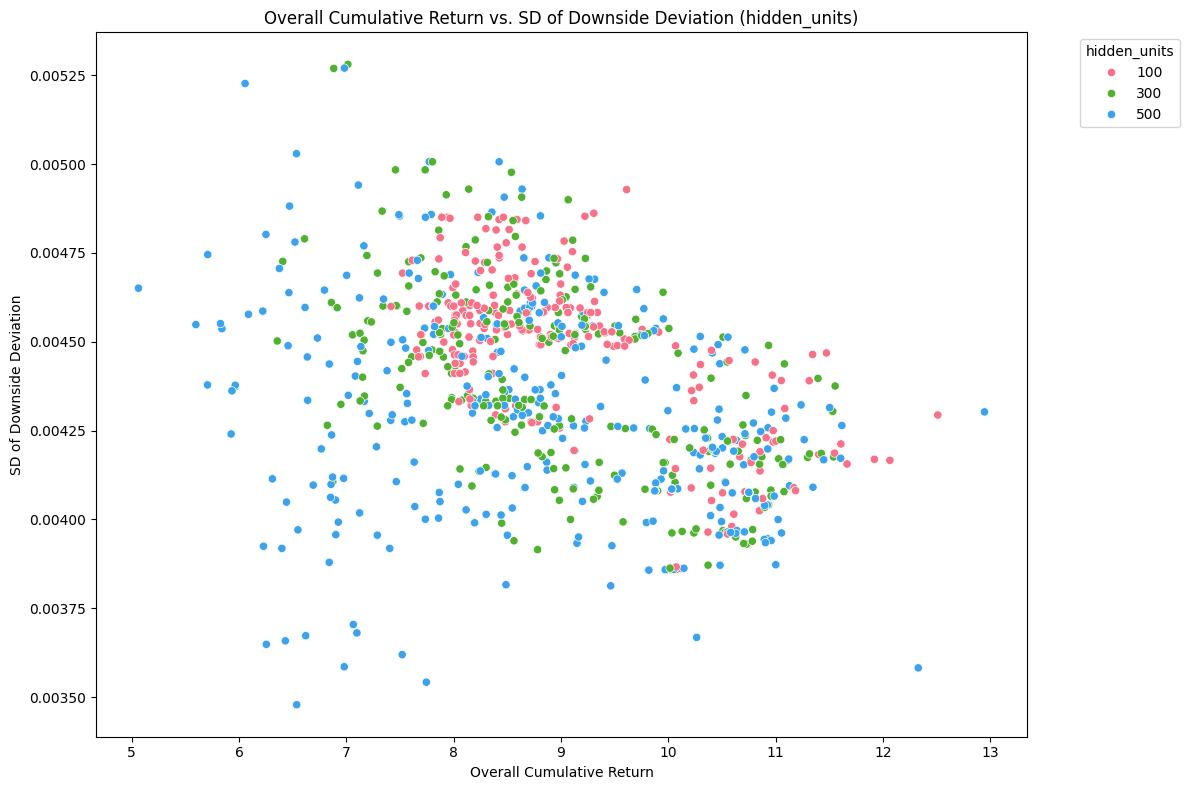

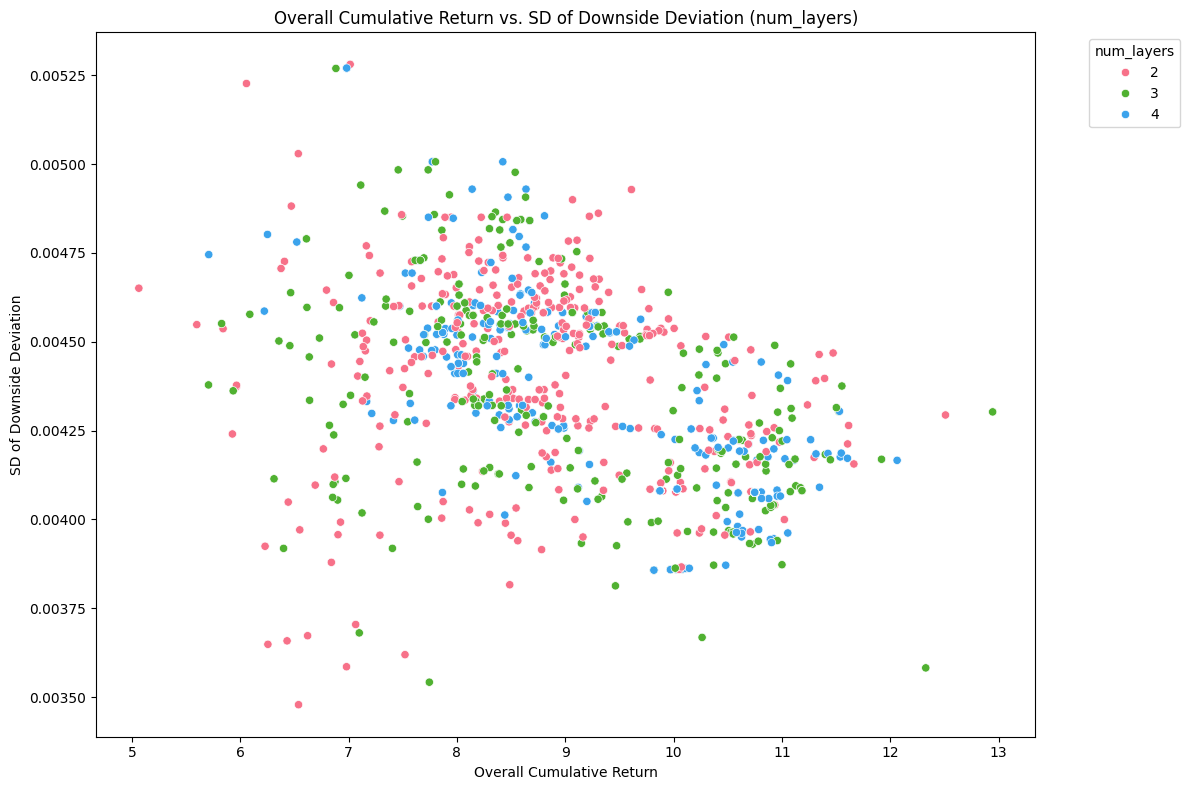

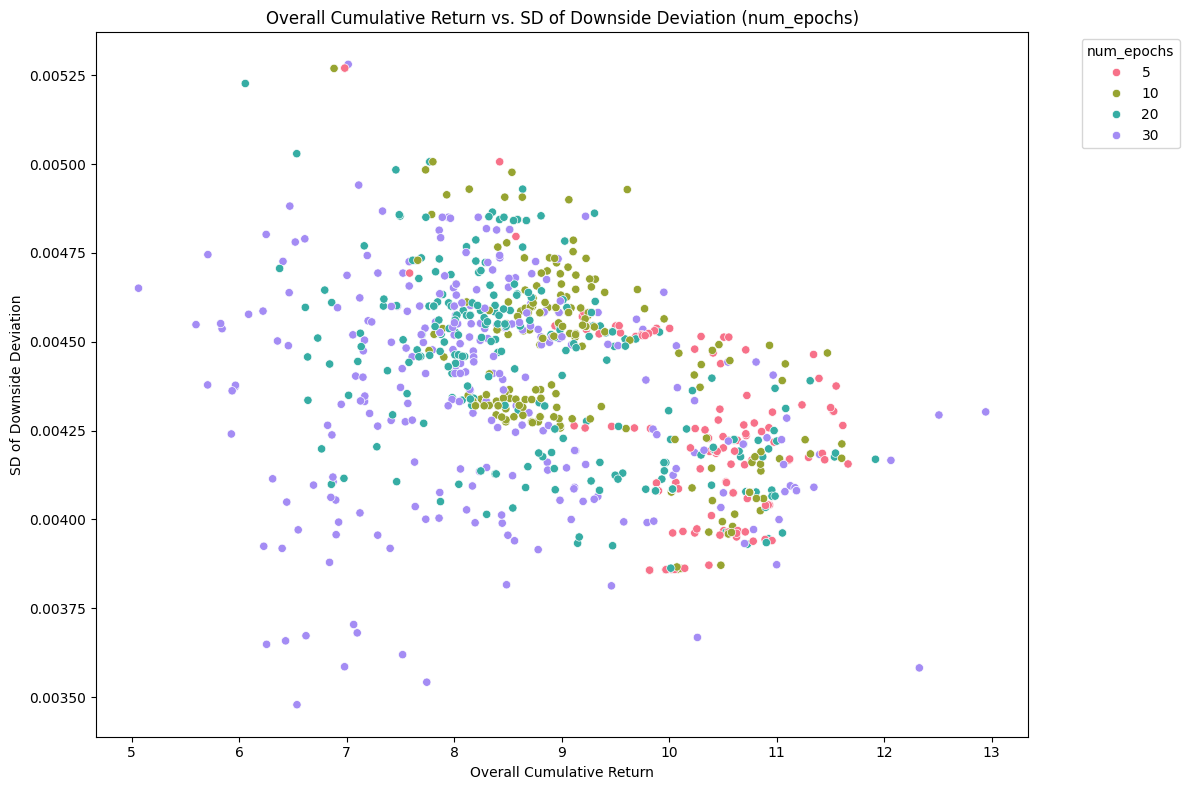

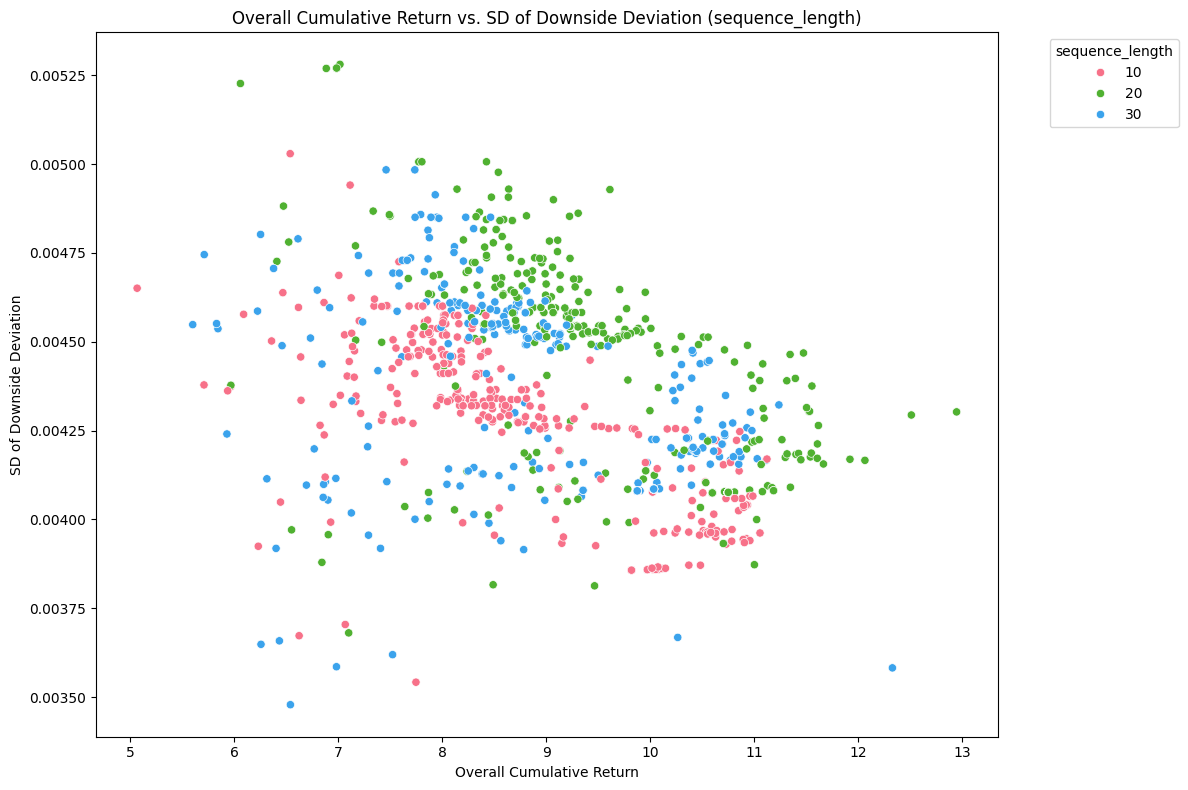

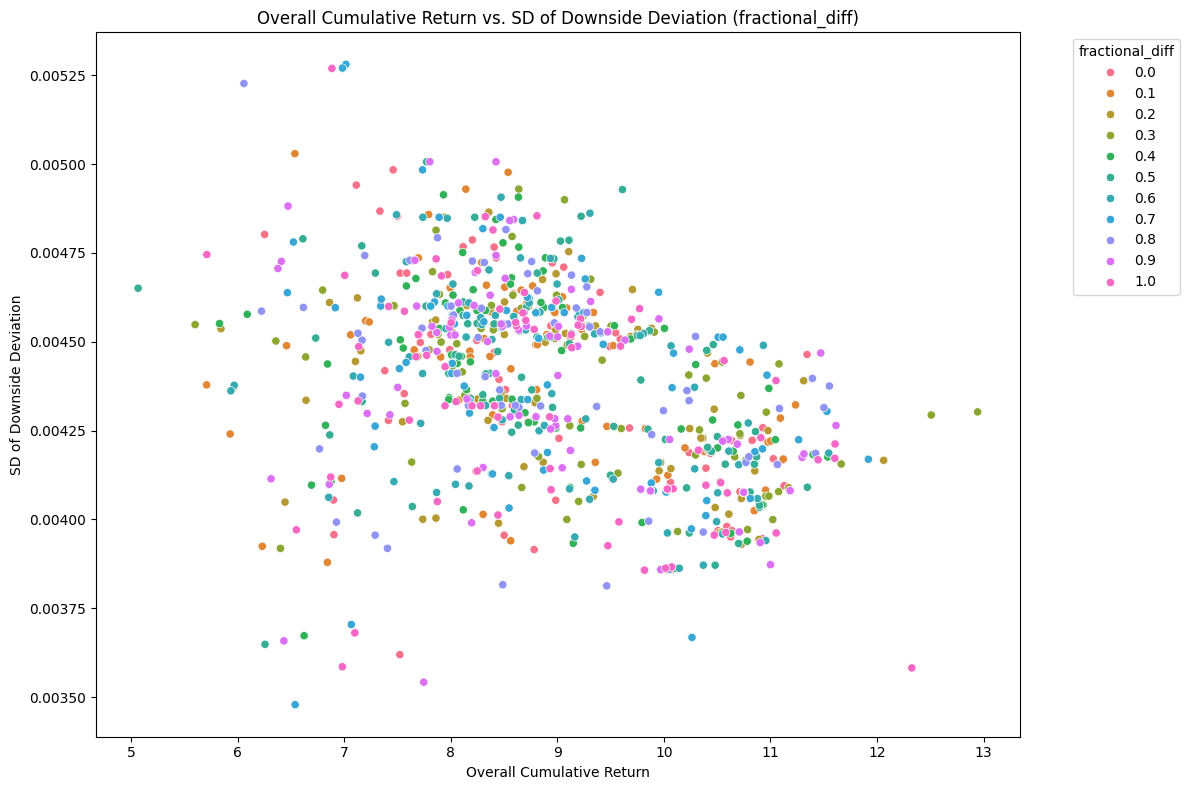

In [34]:
def plot_scatter_for_parameter(df, parameter_name):
    # Ensure a wide variety of colors for different parameter values
    unique_vals = df[parameter_name].unique()
    palette = sns.color_palette("husl", len(unique_vals))

    plt.figure(figsize=(12, 8))
    
    # Creating a scatter plot
    sns.scatterplot(data=df, x='overall_cumulative_return', y='std_downside_deviation', hue=parameter_name, palette=palette, legend='full')
    
    plt.title(f'Overall Cumulative Return vs. SD of Downside Deviation ({parameter_name})')
    plt.xlabel('Overall Cumulative Return')
    plt.ylabel('SD of Downside Deviation')
    plt.legend(title=parameter_name, bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    plt.show()

parameters = ['hidden_units', 'num_layers', 'num_epochs', 'sequence_length', 'fractional_diff']
for parameter in parameters:
    plot_scatter_for_parameter(df, parameter)


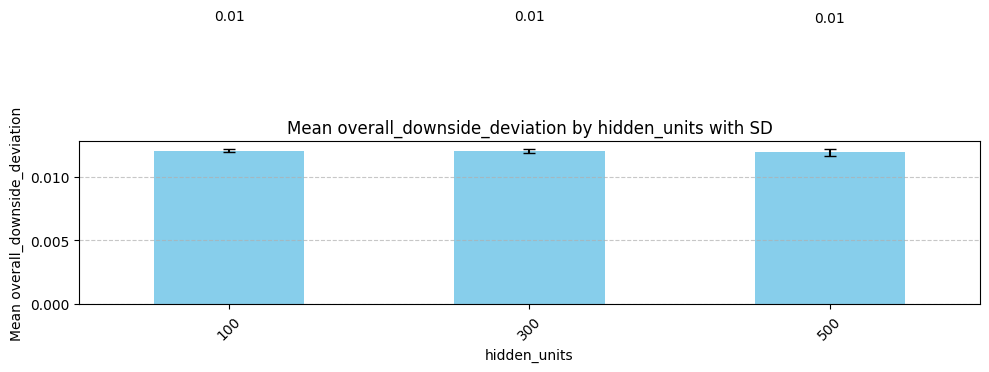

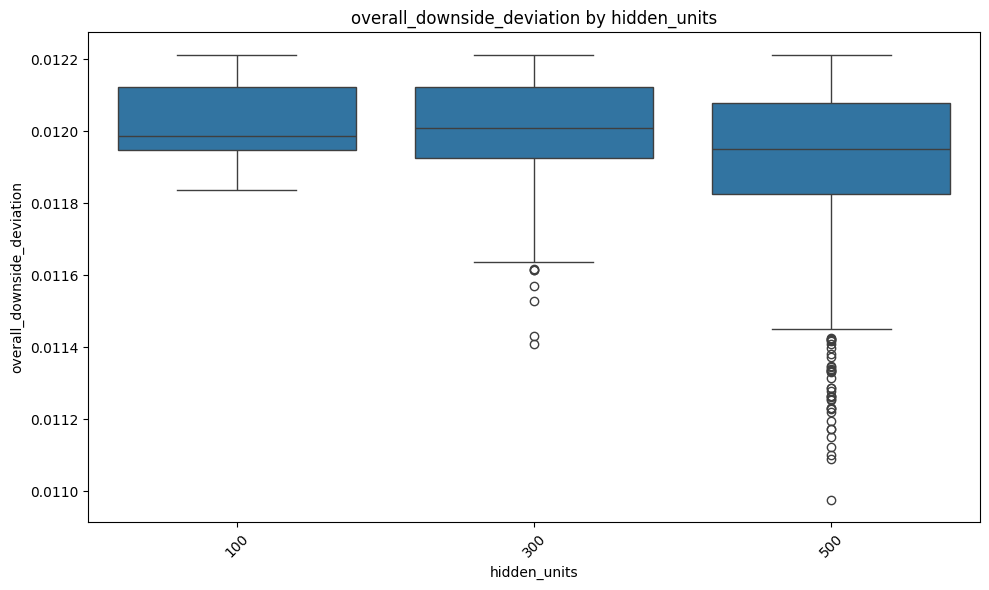

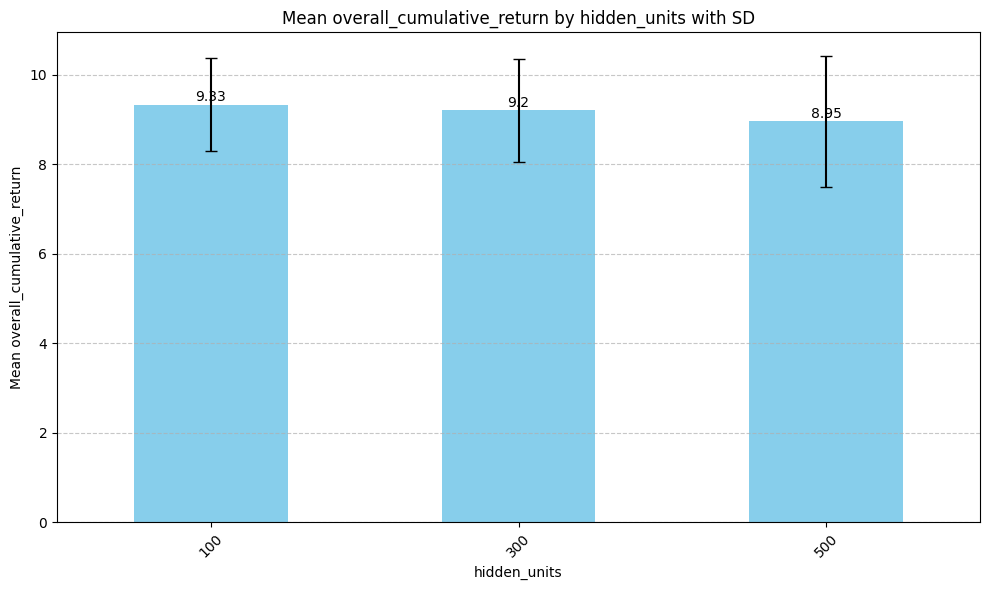

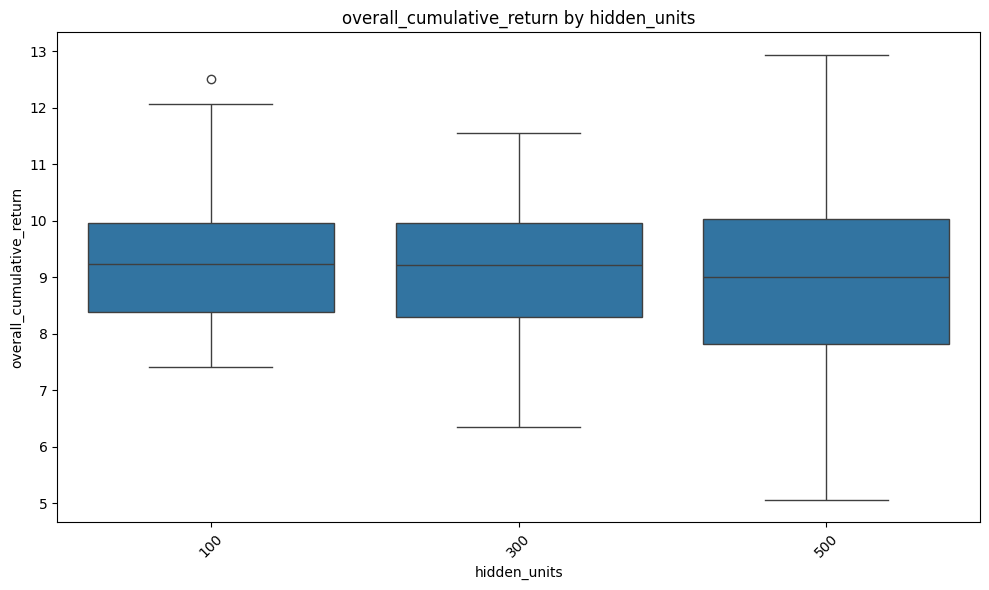

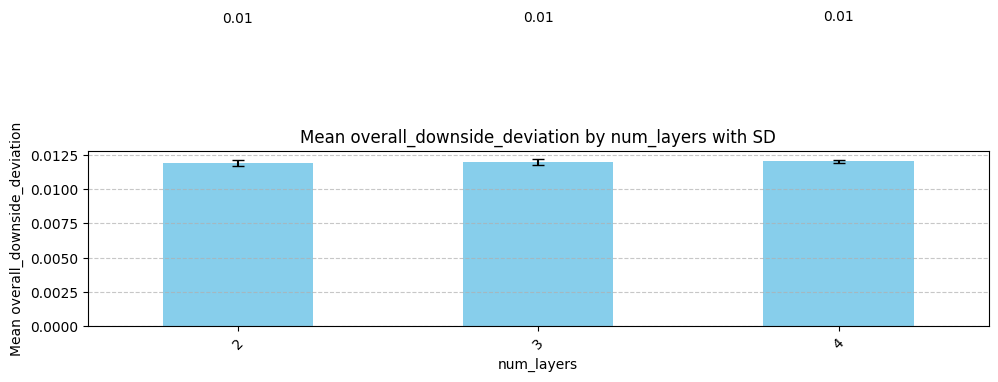

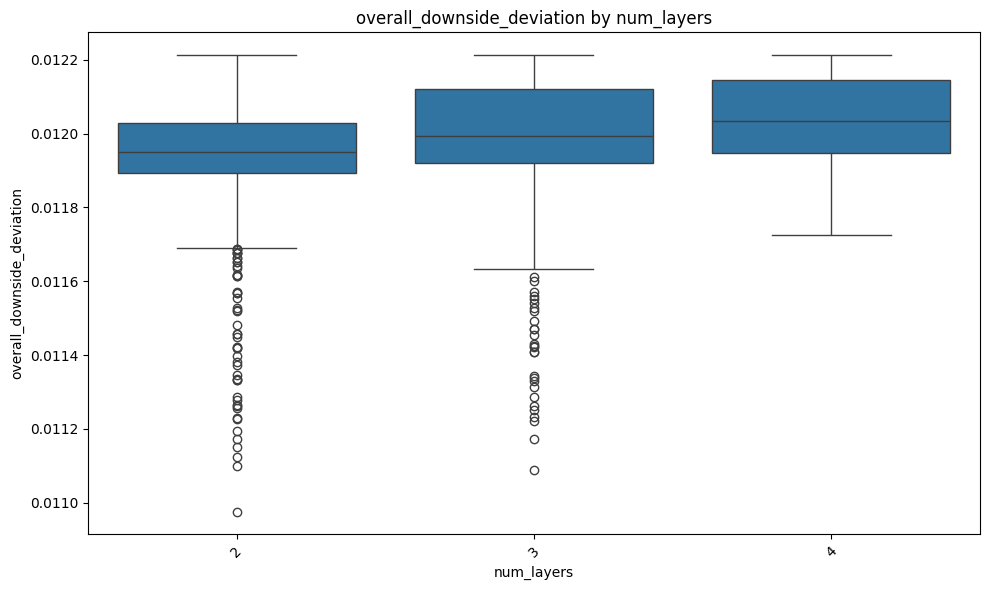

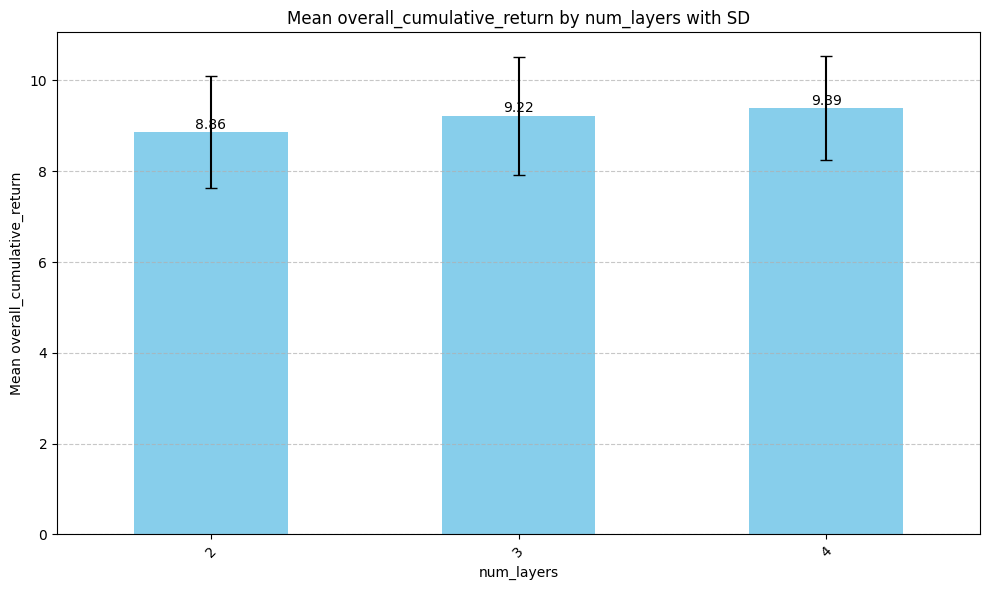

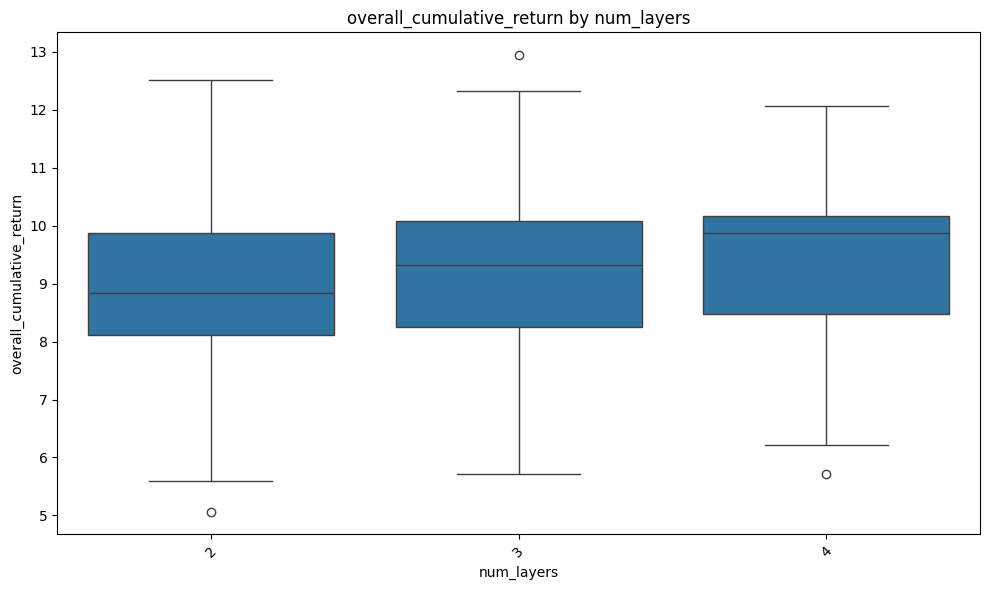

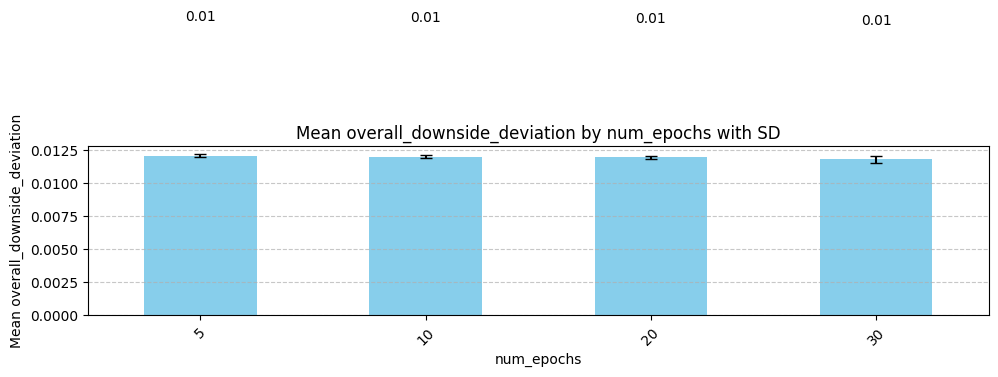

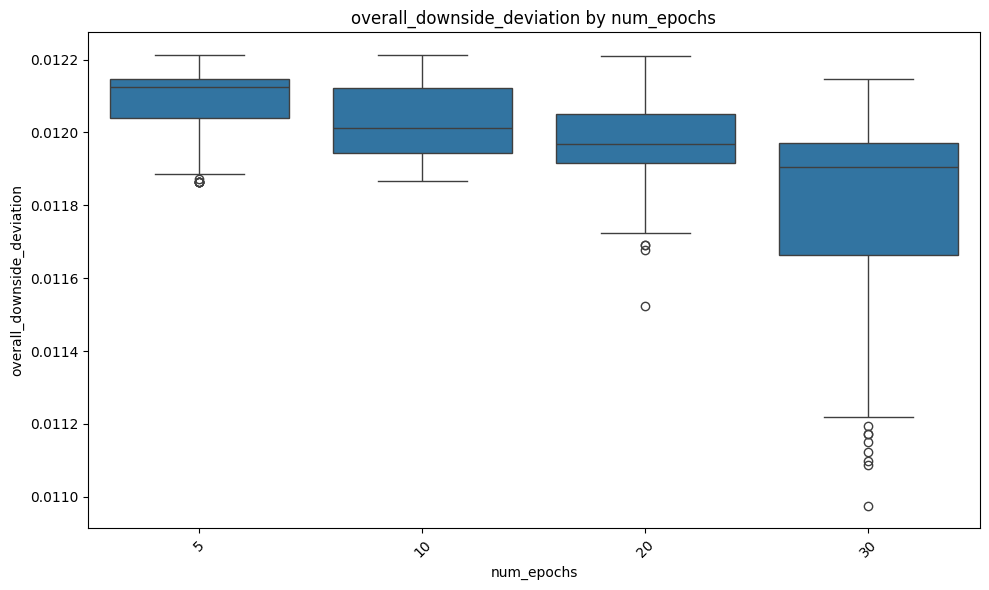

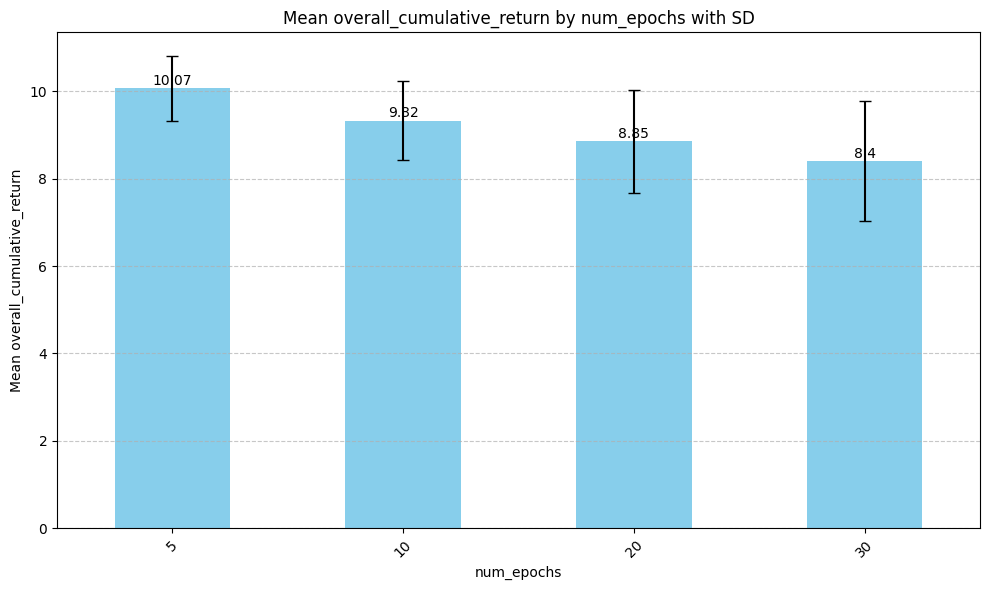

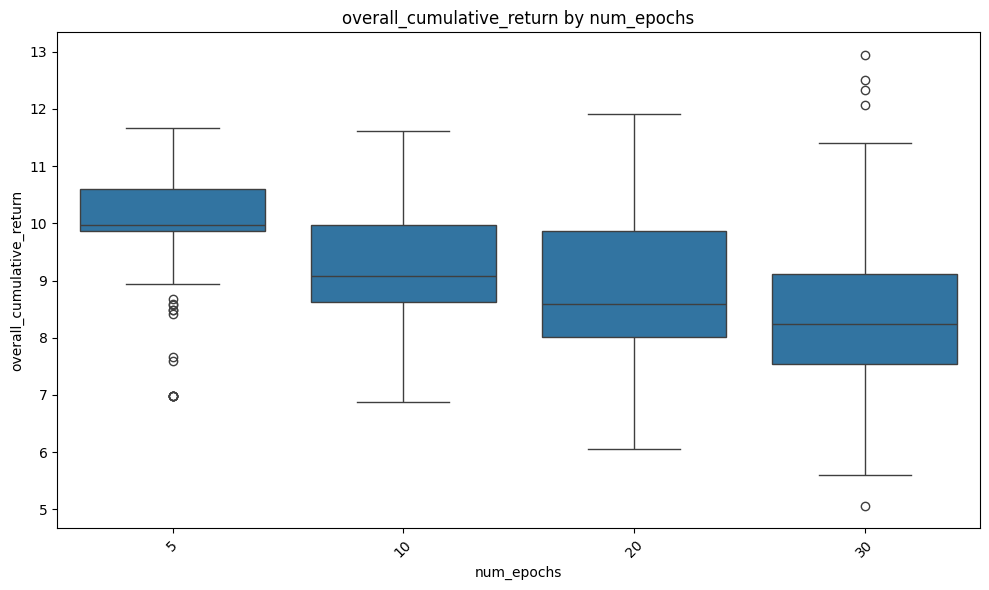

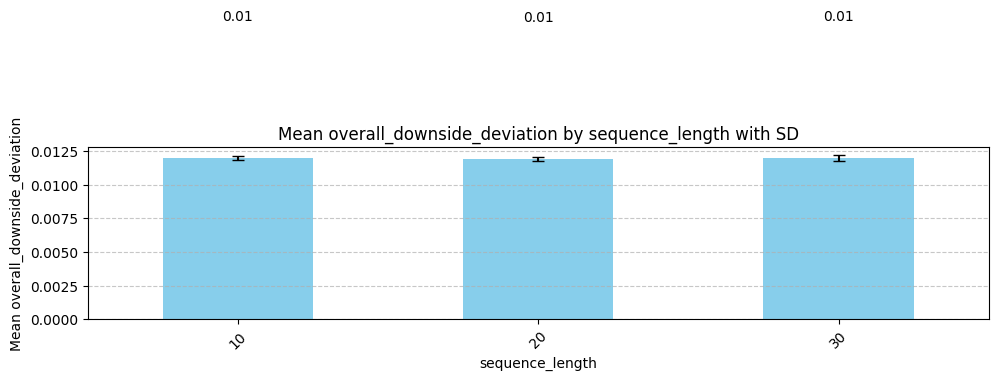

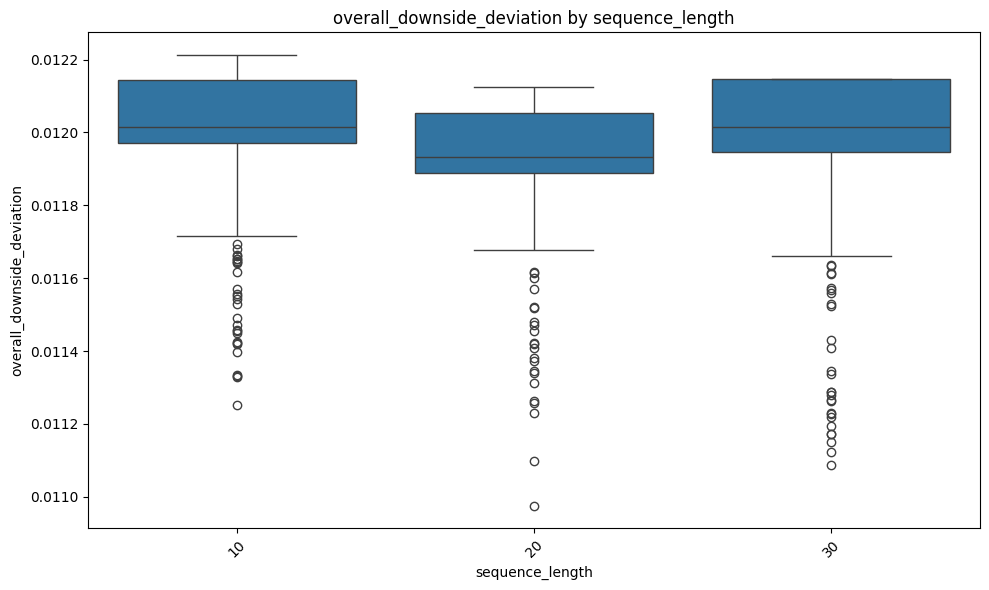

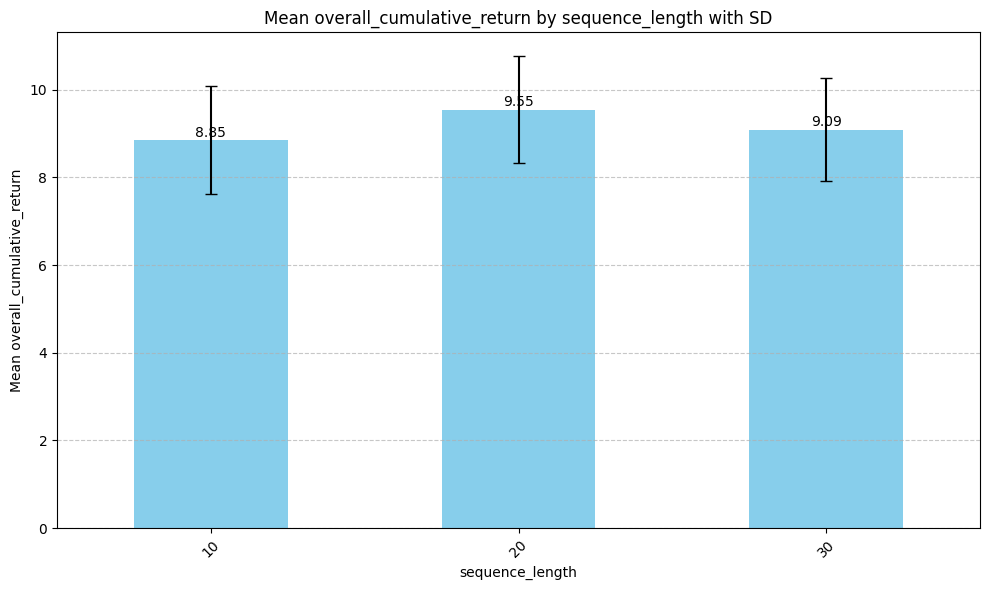

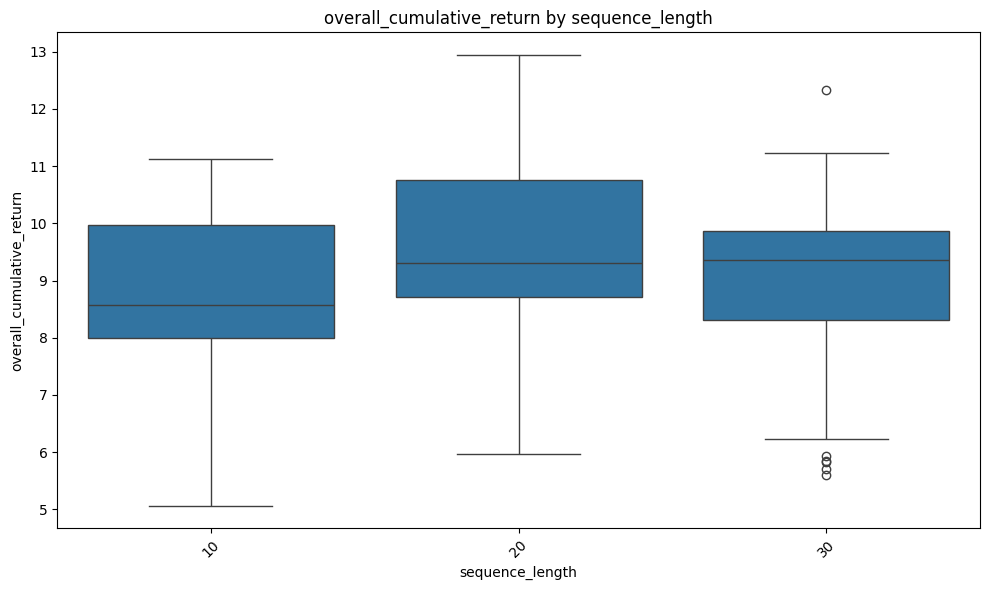

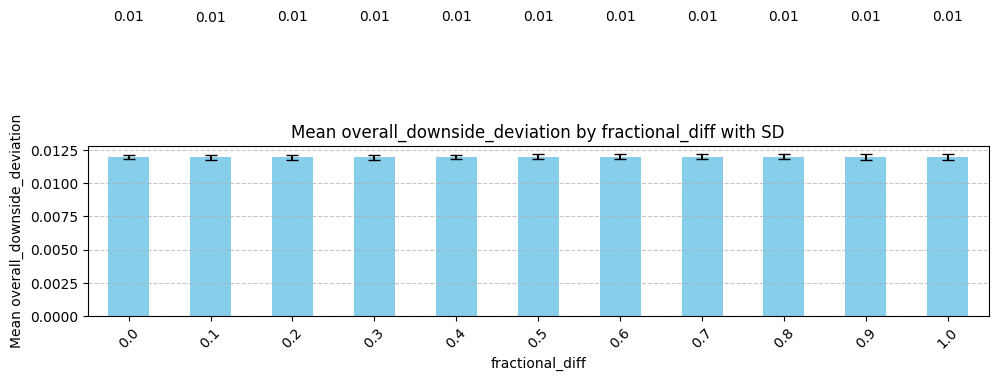

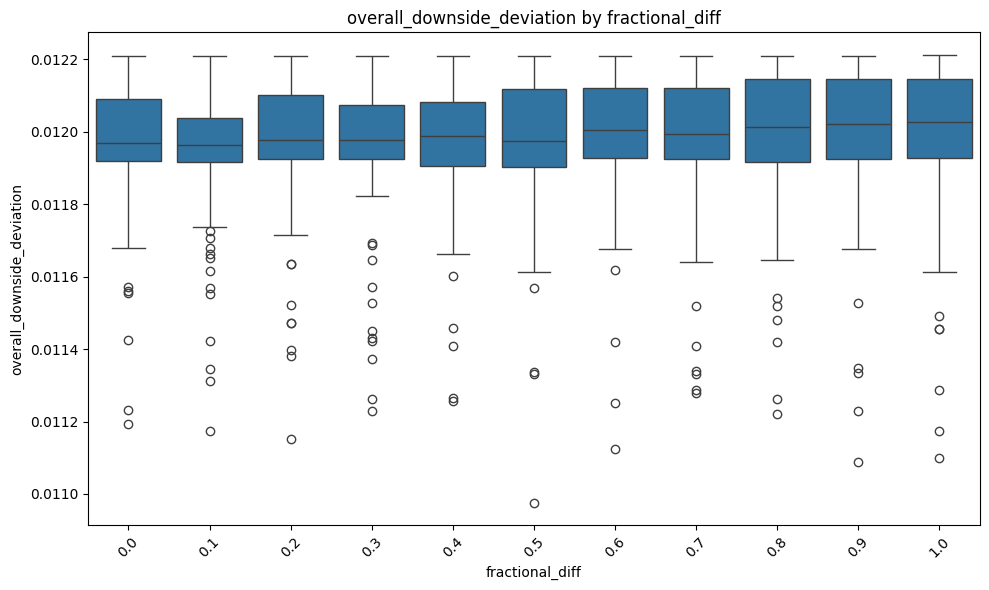

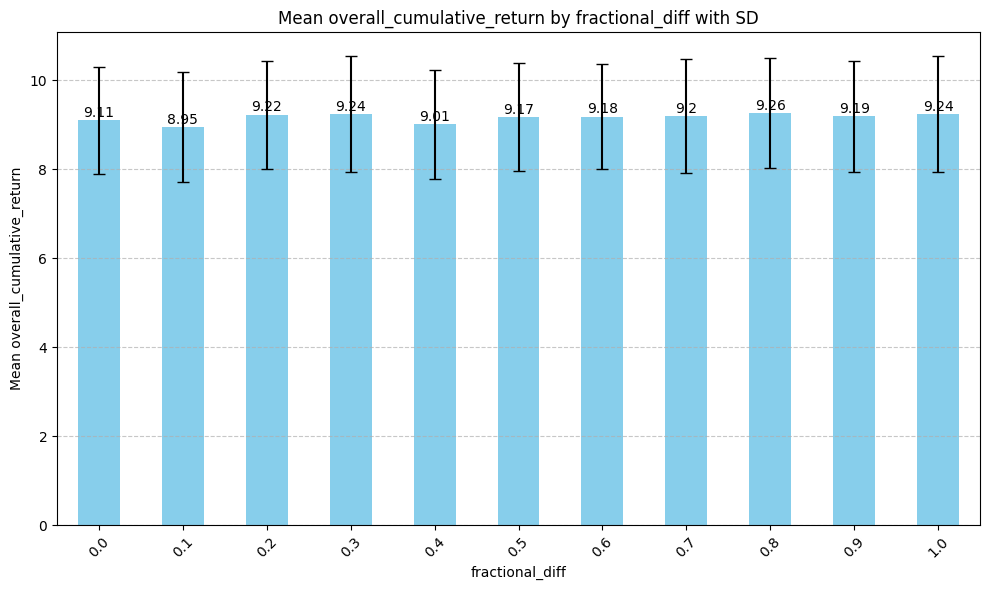

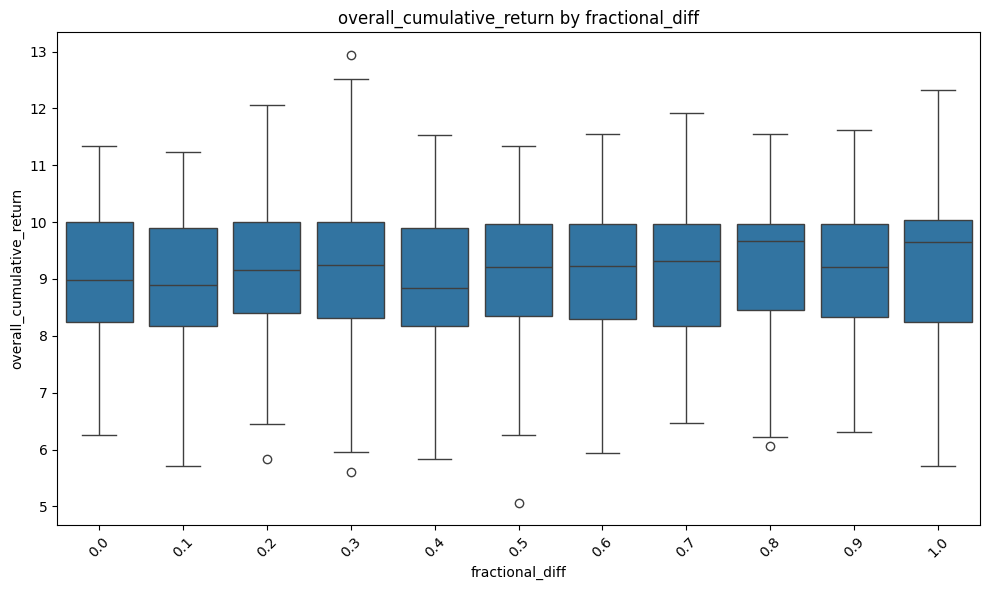

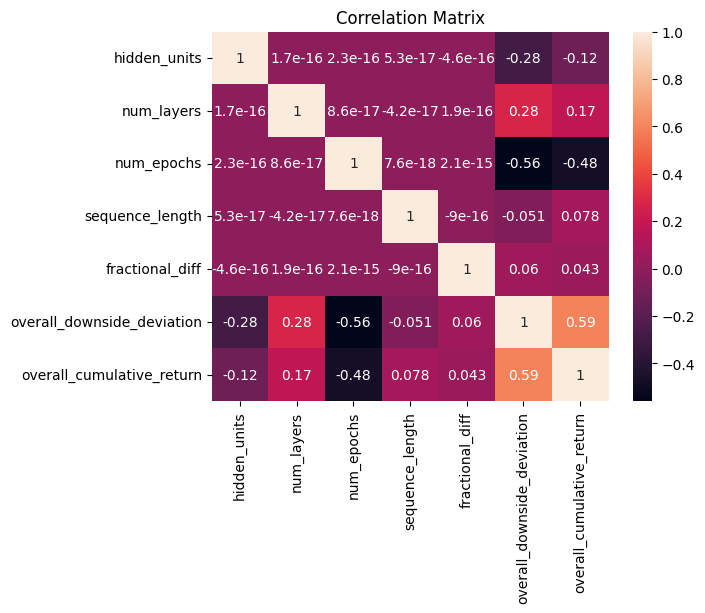

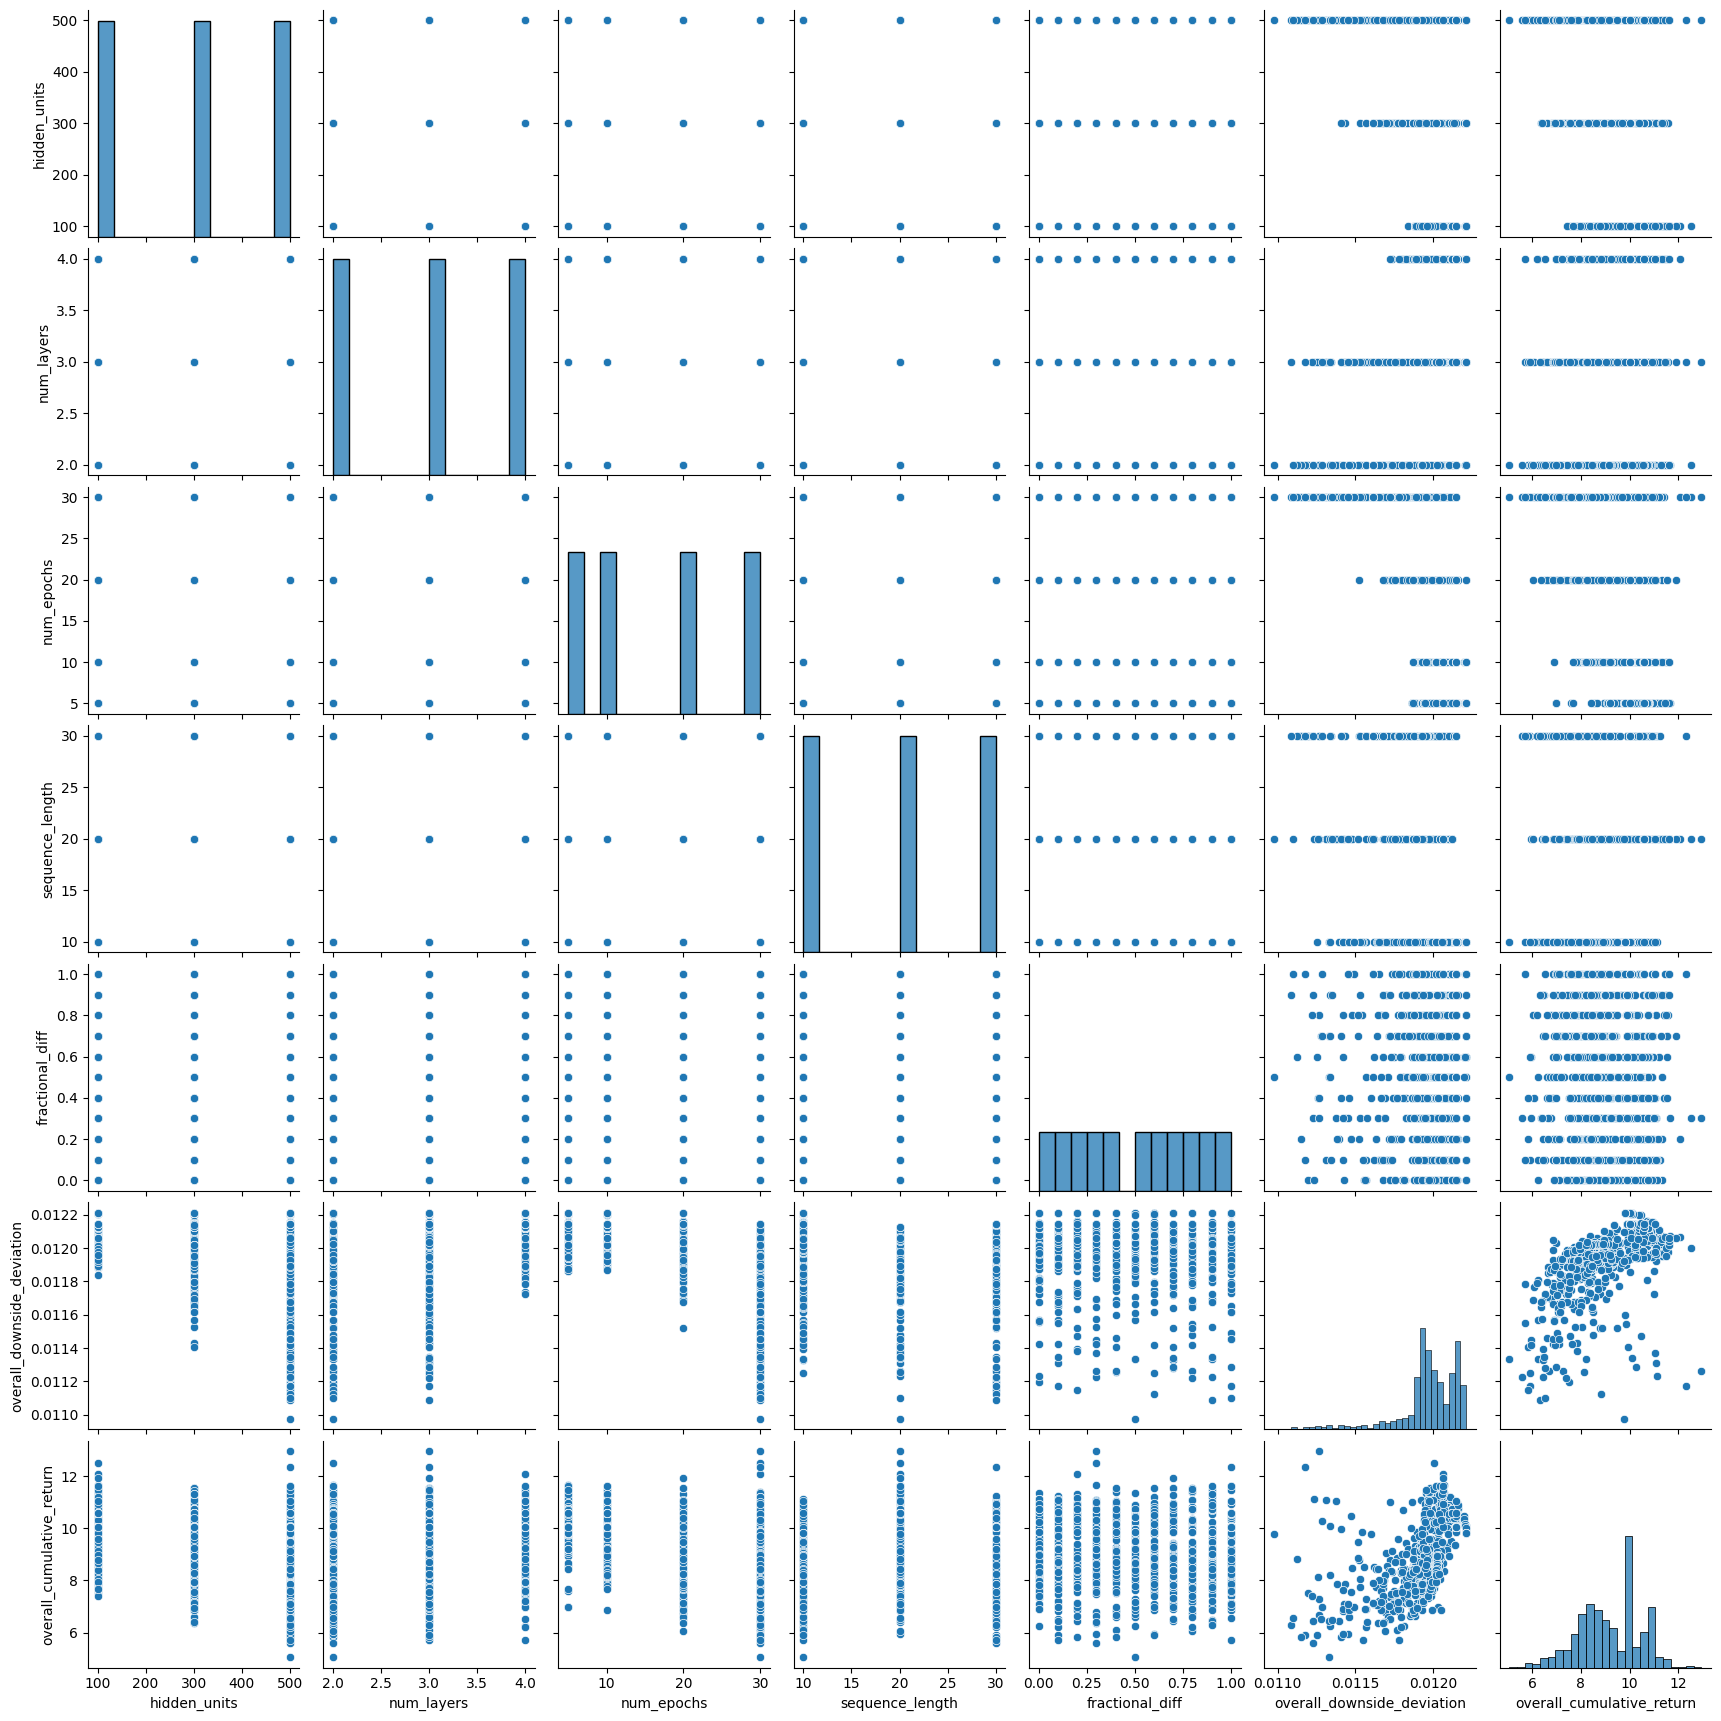

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Function to calculate mean, median, and standard deviation of output variables for each parameter
def calculate_parameter_effects(df, parameter_name, output_variable):
    parameter_effects_mean = df.groupby(parameter_name)[output_variable].mean()
    parameter_effects_std = df.groupby(parameter_name)[output_variable].std()
    return parameter_effects_mean, parameter_effects_std

def plot_parameter_effects(parameter_effects_mean, parameter_effects_std, parameter_name, output_variable):
    plt.figure(figsize=(10, 6))
    bars = parameter_effects_mean.plot(kind='bar', yerr=parameter_effects_std, capsize=4, color='skyblue')
    plt.title(f'Mean {output_variable} by {parameter_name} with SD')
    plt.xlabel(parameter_name)
    plt.ylabel(f'Mean {output_variable}')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Add numbers on the bars
    for bar in bars.patches:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

# Function to plot box plot for each parameter
def plot_box_plot(df, parameter_name, output_variable):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=parameter_name, y=output_variable, data=df)
    plt.title(f'{output_variable} by {parameter_name}')
    plt.xlabel(parameter_name)
    plt.ylabel(output_variable)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# List of parameters
parameters = ['hidden_units', 'num_layers', 'num_epochs', 'sequence_length', 'fractional_diff']

# Analyze and plot the effects of each parameter on output variables
for parameter in parameters:
    for output_variable in ['overall_downside_deviation', 'overall_cumulative_return']:
        parameter_effects_mean, parameter_effects_std = calculate_parameter_effects(df, parameter, output_variable)
        plot_parameter_effects(parameter_effects_mean, parameter_effects_std, parameter, output_variable)
        plot_box_plot(df, parameter, output_variable)

# Correlation analysis
correlation_matrix = df[parameters + ['overall_downside_deviation', 'overall_cumulative_return']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

# Scatter plot matrix
sns.pairplot(df[parameters + ['overall_downside_deviation', 'overall_cumulative_return']])
plt.show()